### EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


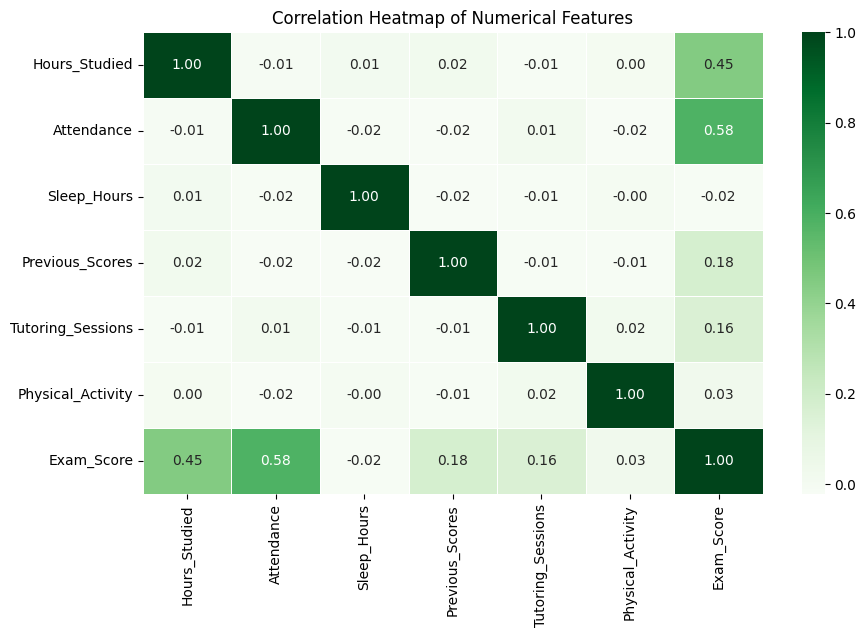

In [ ]:
fiturNumerik = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]
correlation_matrix = fiturNumerik.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

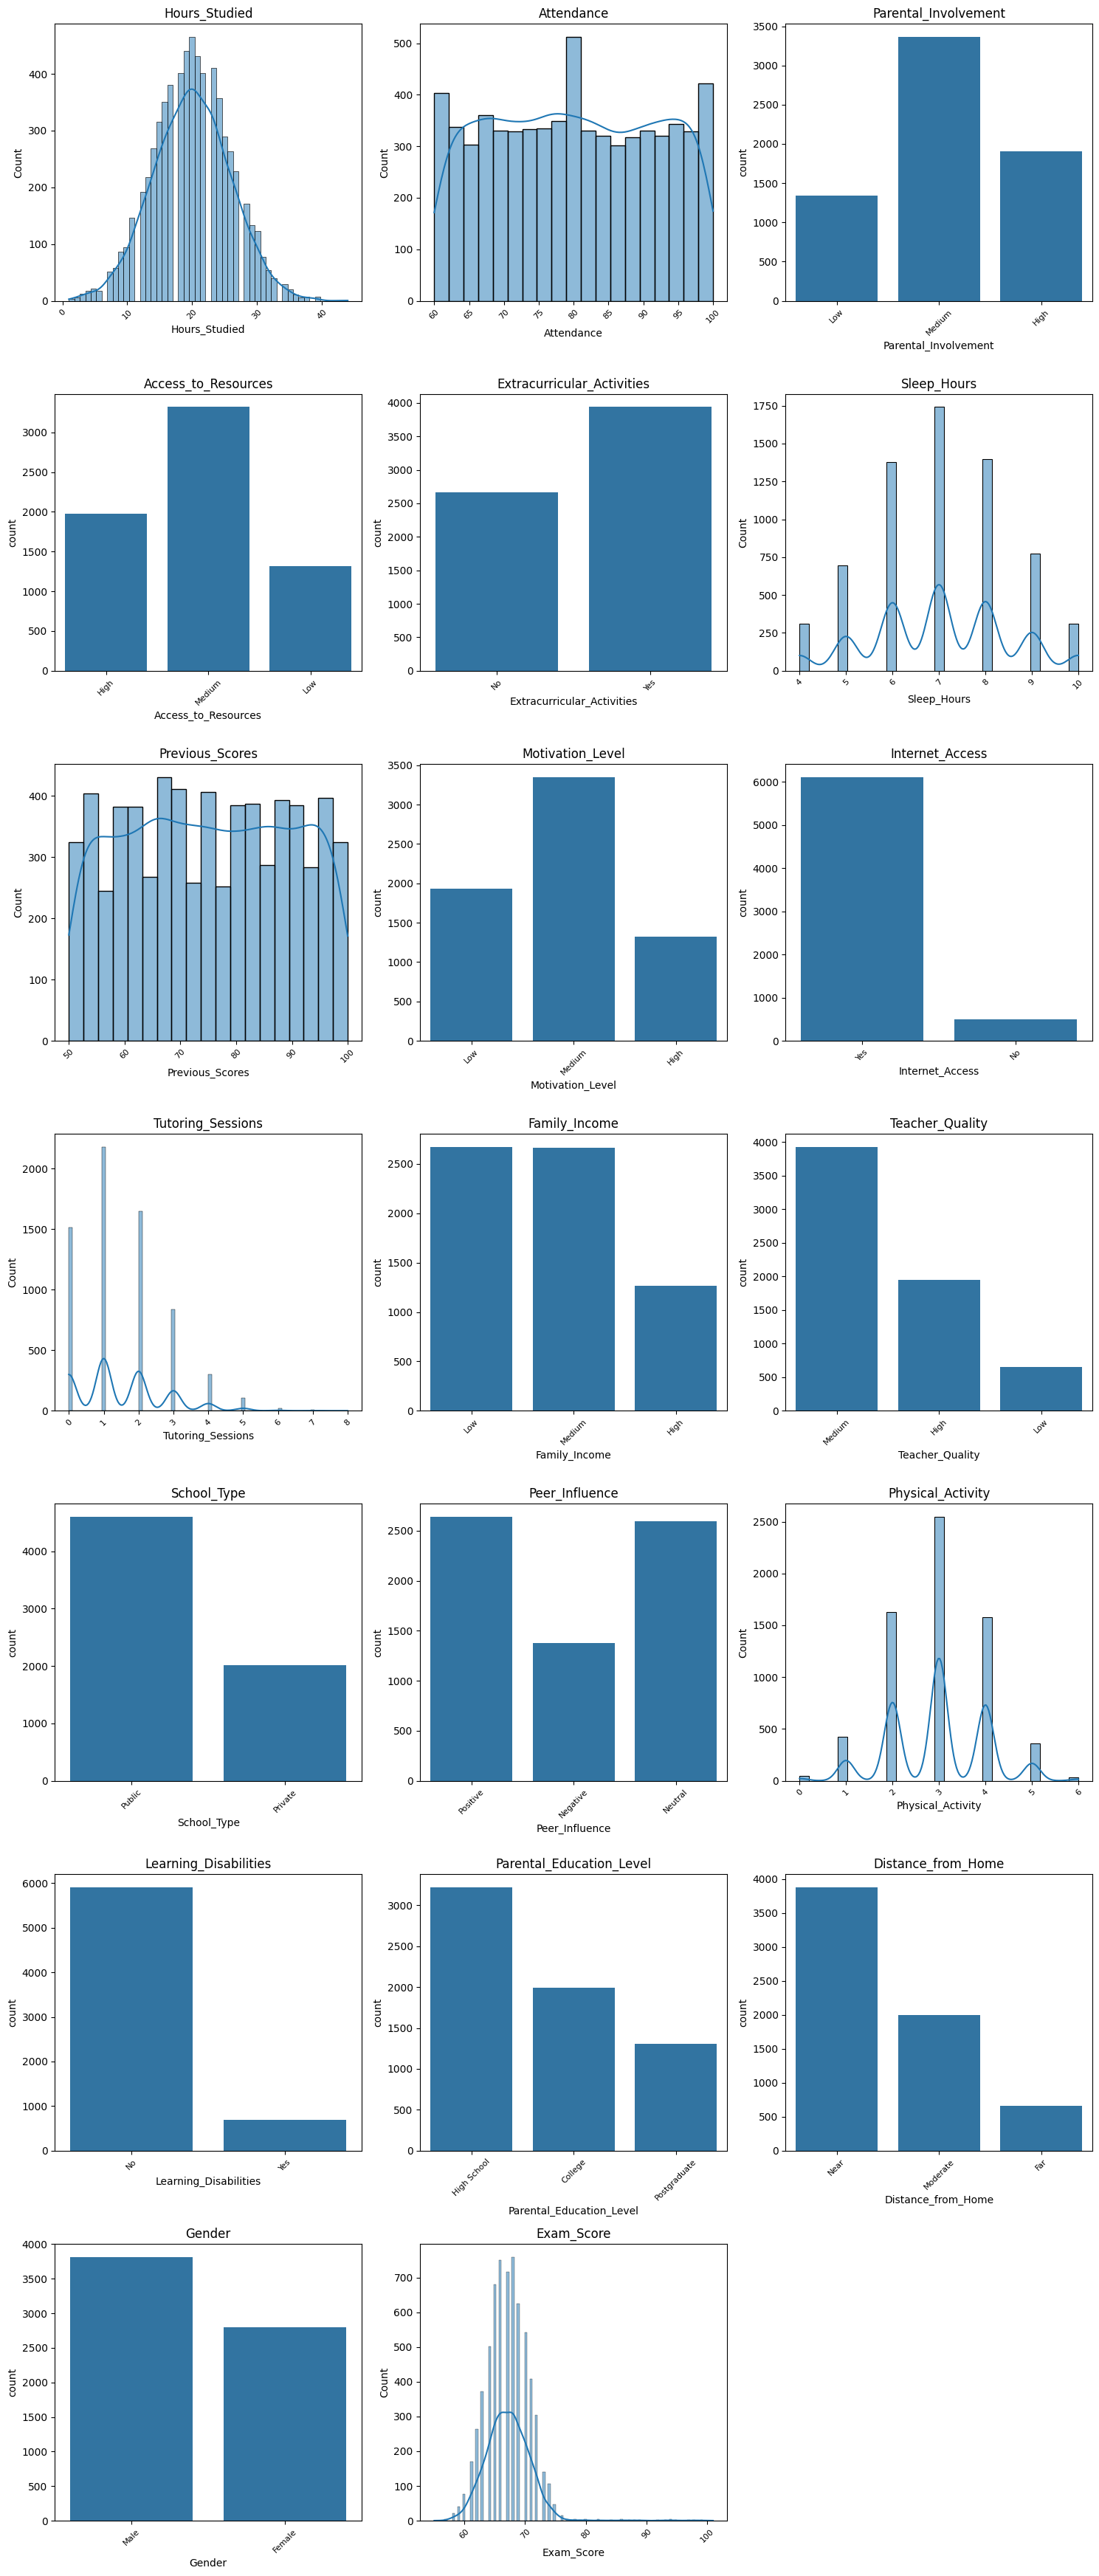

In [ ]:
def plot_column_distributions(df, columns_per_row=3):
    num_rows = (len(df.columns) + columns_per_row - 1) // columns_per_row
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))

    for i, col in enumerate(df.columns):
        row = i // columns_per_row
        col_idx = i % columns_per_row
        if num_rows > 1:
          ax = axes[row, col_idx]
        else:
          axes[col_idx]

        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col], kde=True, ax=ax)
        else:
            sns.countplot(x=col, data=df, ax=ax)

        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45, labelsize=8)


    for i in range(len(df.columns), num_rows * columns_per_row):
        row = i // columns_per_row
        col_idx = i % columns_per_row
        if num_rows > 1:
            fig.delaxes(axes[row, col_idx])
        else:
            fig.delaxes(axes[col_idx])

    plt.tight_layout()
    plt.show()

plot_column_distributions(df)

In [ ]:
for column in df.columns:
  mode_value = df[column].mode()[0]
  print(f"Mayoritas siswa pada parameter {column}: {mode_value}")

Mayoritas siswa pada parameter Hours_Studied: 20
Mayoritas siswa pada parameter Attendance: 67
Mayoritas siswa pada parameter Parental_Involvement: Medium
Mayoritas siswa pada parameter Access_to_Resources: Medium
Mayoritas siswa pada parameter Extracurricular_Activities: Yes
Mayoritas siswa pada parameter Sleep_Hours: 7
Mayoritas siswa pada parameter Previous_Scores: 66
Mayoritas siswa pada parameter Motivation_Level: Medium
Mayoritas siswa pada parameter Internet_Access: Yes
Mayoritas siswa pada parameter Tutoring_Sessions: 1
Mayoritas siswa pada parameter Family_Income: Low
Mayoritas siswa pada parameter Teacher_Quality: Medium
Mayoritas siswa pada parameter School_Type: Public
Mayoritas siswa pada parameter Peer_Influence: Positive
Mayoritas siswa pada parameter Physical_Activity: 3
Mayoritas siswa pada parameter Learning_Disabilities: No
Mayoritas siswa pada parameter Parental_Education_Level: High School
Mayoritas siswa pada parameter Distance_from_Home: Near
Mayoritas siswa pada

Misal, siswa dengan nilai <= 60 adalah siswa yang tidak lulus ujian. Maka di bawah ini adalah statistik mengenai siswa yang tidak lulus.

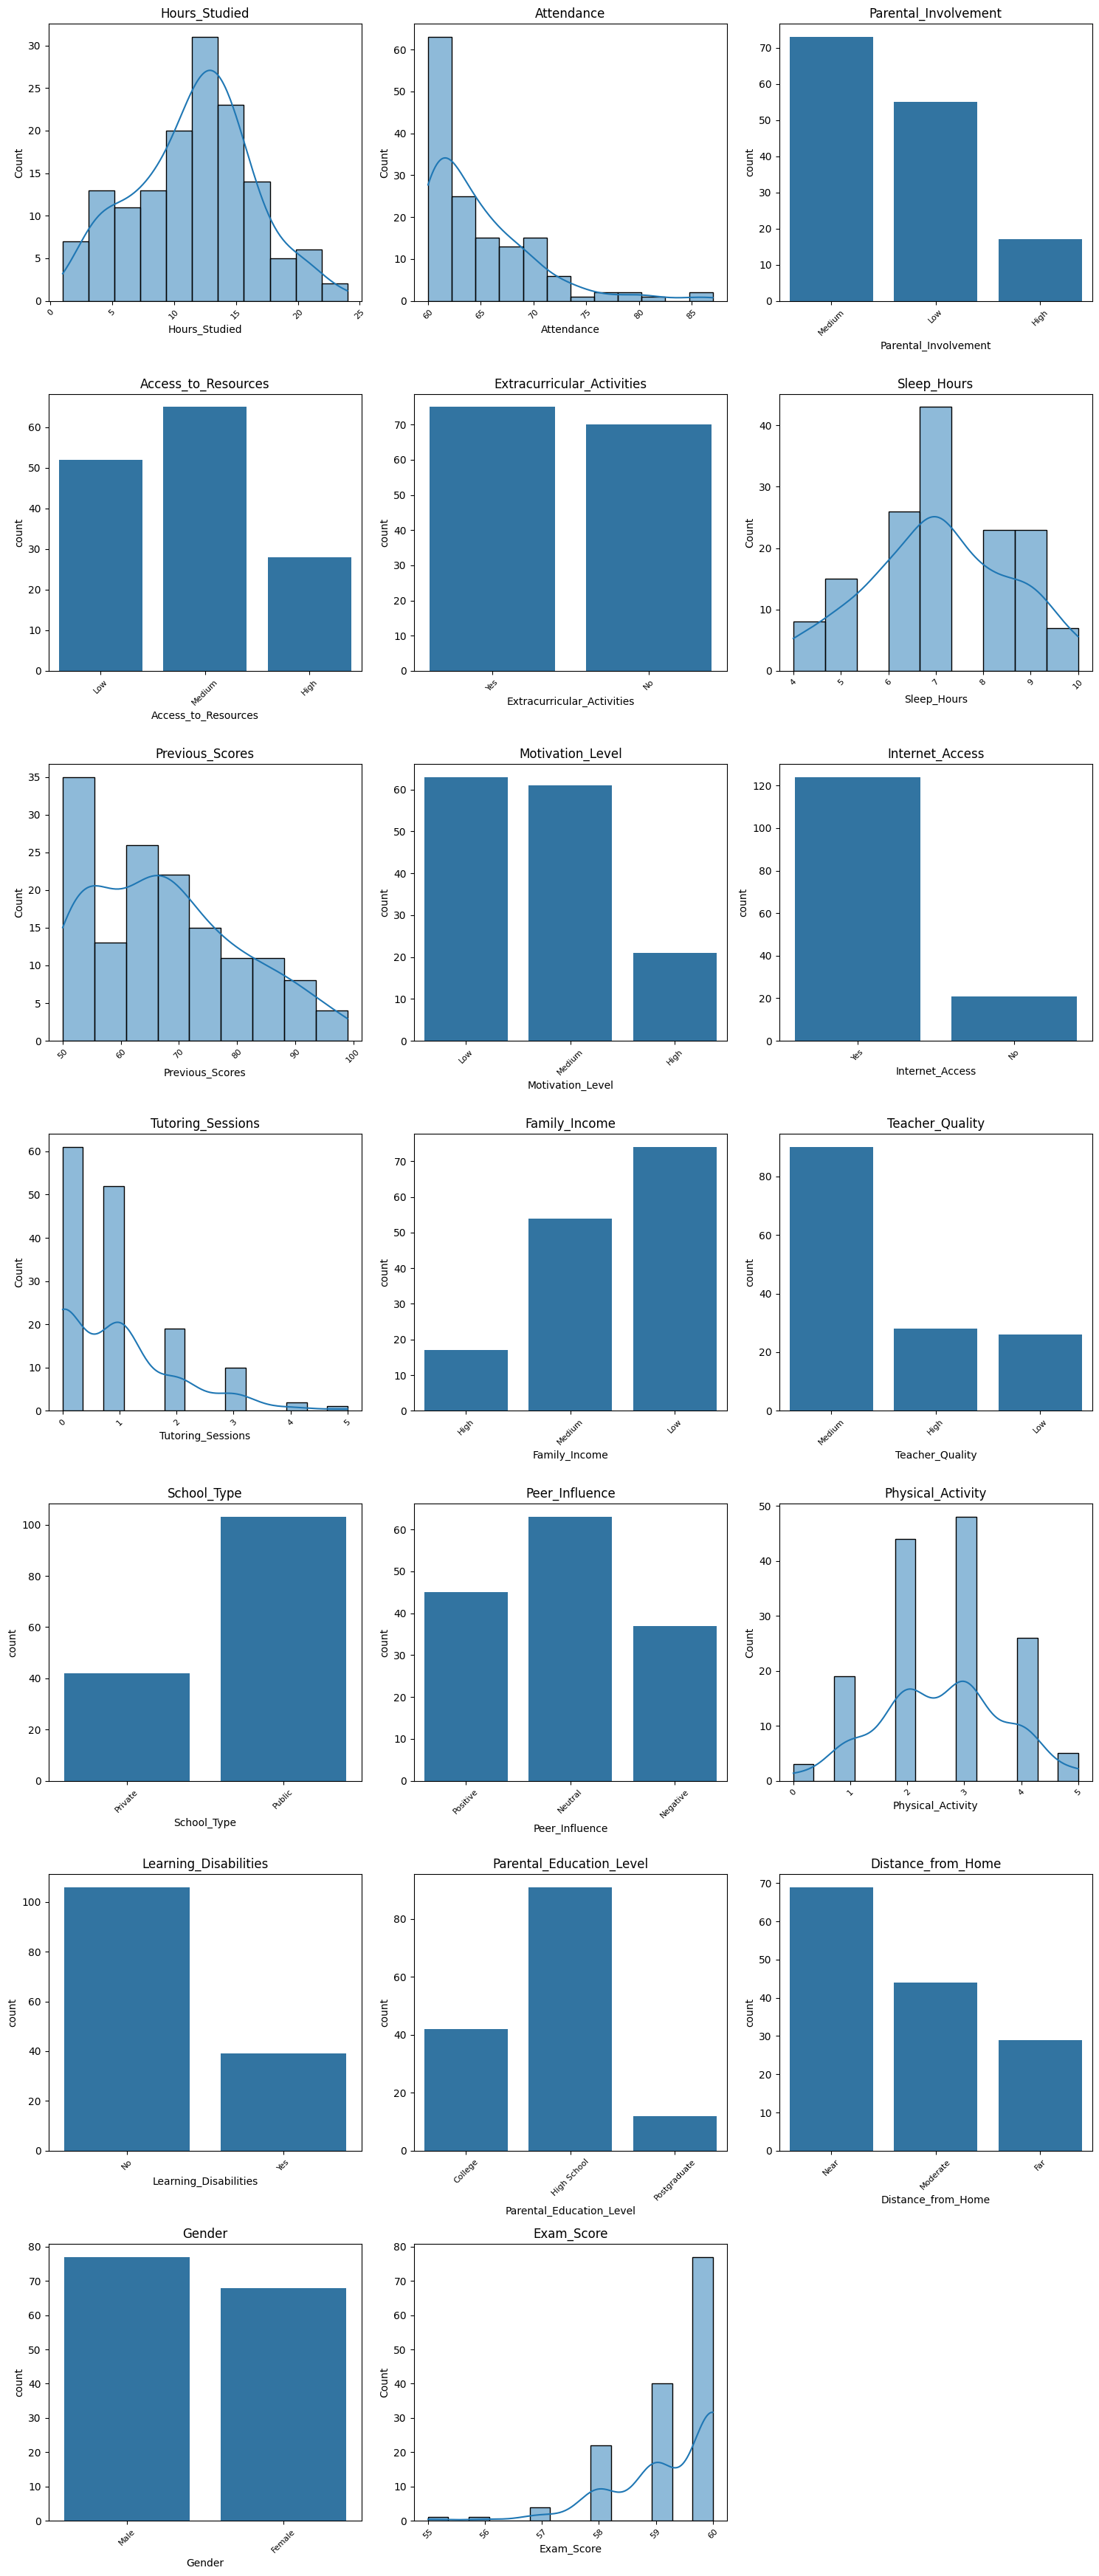

In [ ]:
plot_column_distributions(df[df['Exam_Score'] <= 60])

Sedangkan, di bawah ini merupakan siswa yang lulus

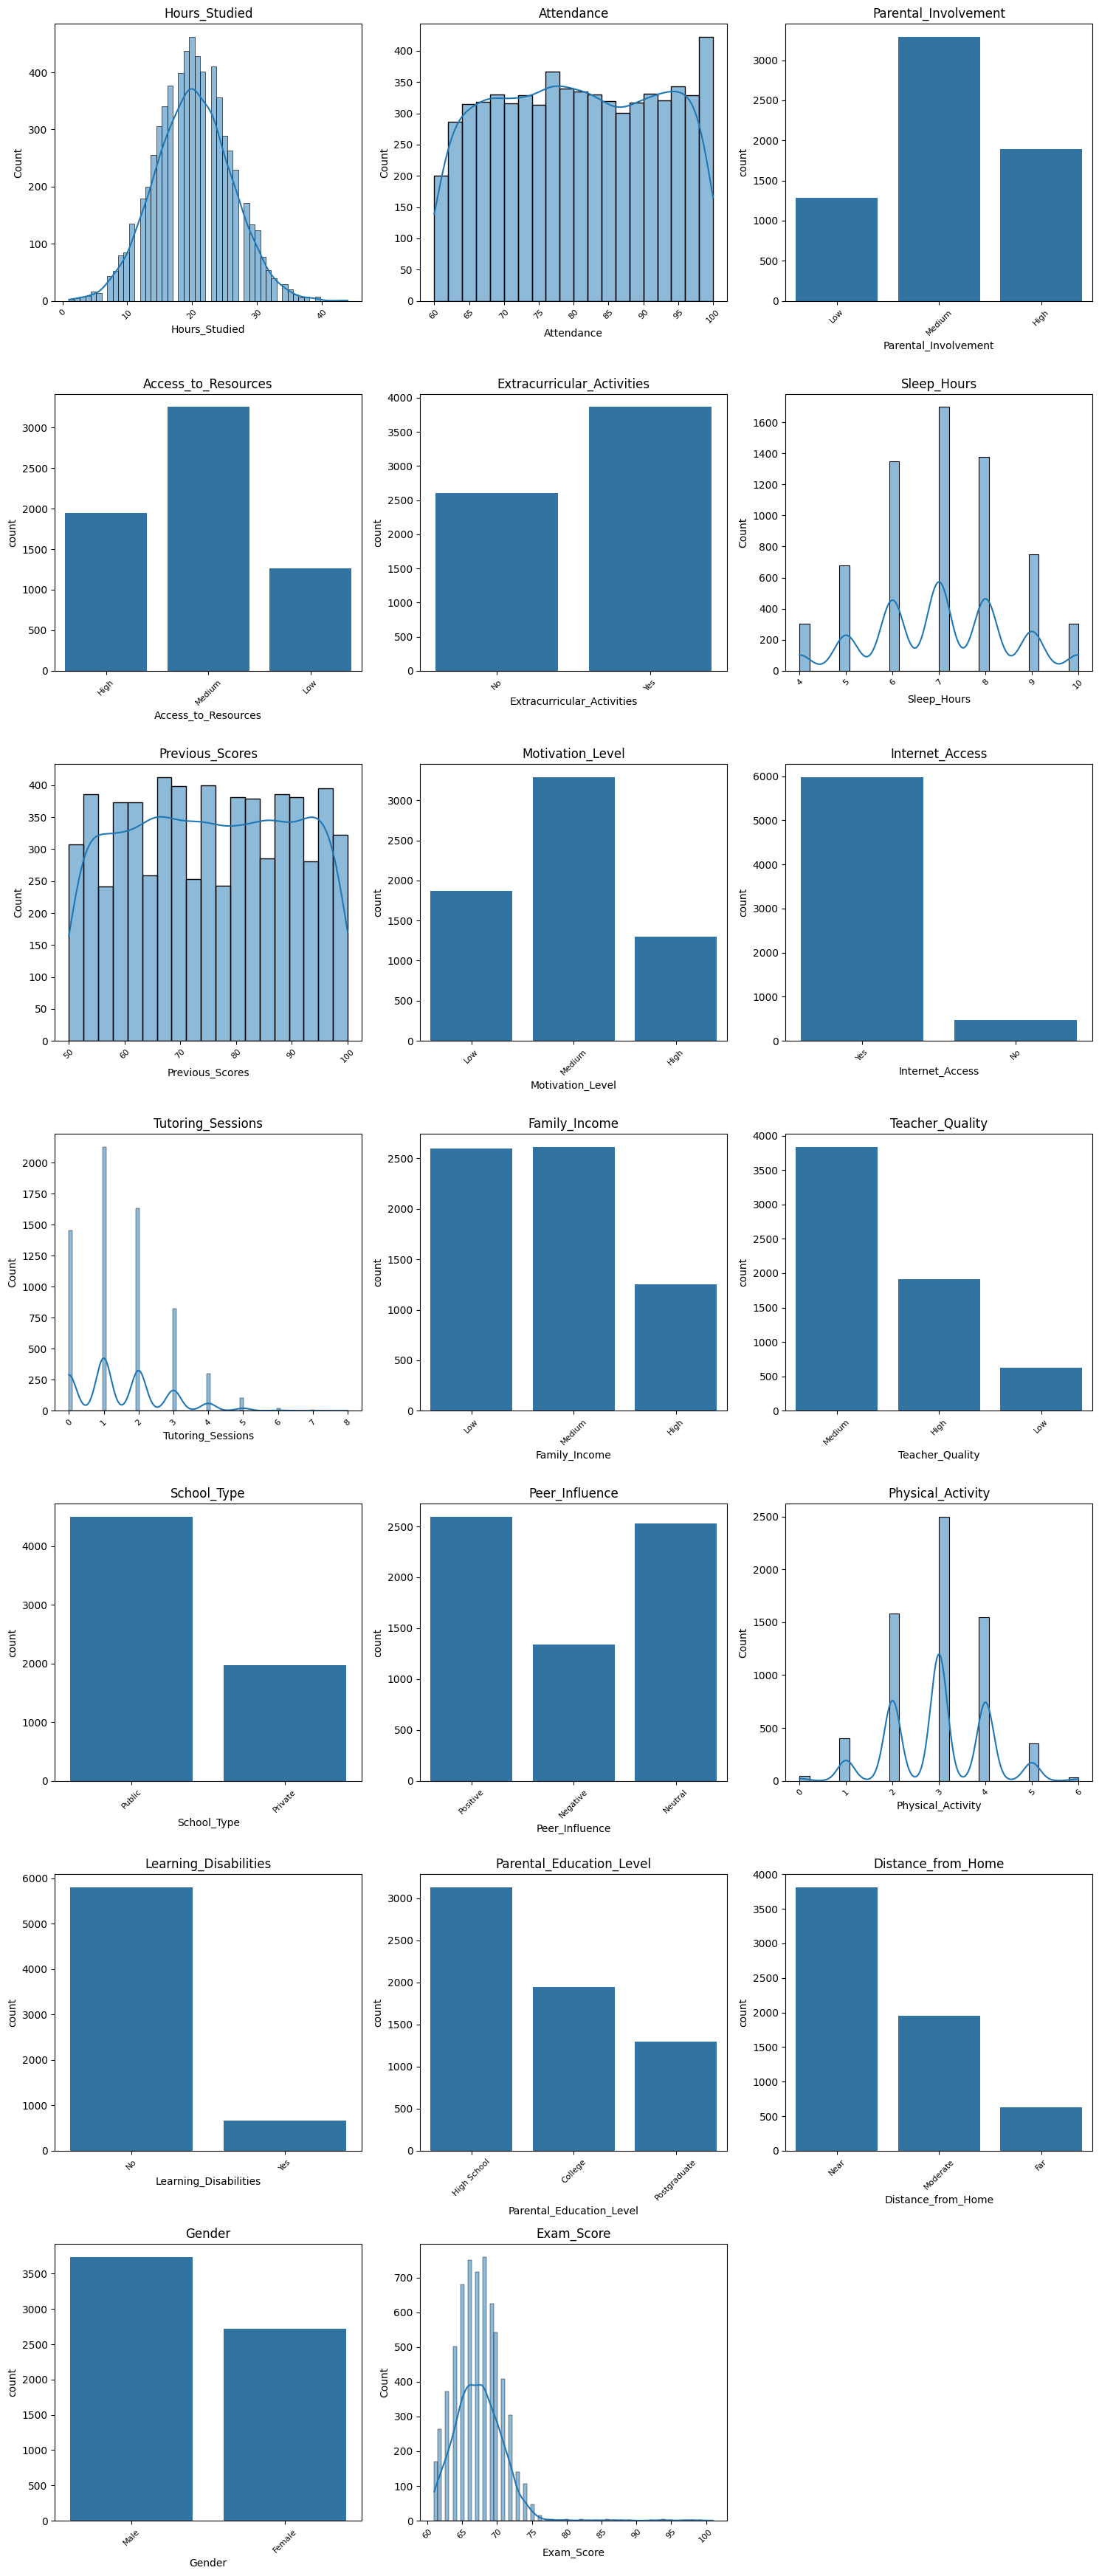

In [ ]:
plot_column_distributions(df[df['Exam_Score'] > 60])

Perbandingannya

In [ ]:
lulus = df[df['Exam_Score'] > 60]
glulus = df[df['Exam_Score'] <= 60]

# Perbandingan lulus dan tidak lulus dengan pendekatan modus
for column in df.iloc[:, :-1]:
      mode_lulus = lulus[column].mode()[0]
      mode_glulus = glulus[column].mode()[0]
      print(f"Mayoritas parameter {column}:")
      print(f"  Lulus: {mode_lulus}")
      print(f"  Tidak lulus: {mode_glulus}\n")

Mayoritas parameter Hours_Studied:
  Lulus: 20
  Tidak lulus: 13

Mayoritas parameter Attendance:
  Lulus: 98
  Tidak lulus: 61

Mayoritas parameter Parental_Involvement:
  Lulus: Medium
  Tidak lulus: Medium

Mayoritas parameter Access_to_Resources:
  Lulus: Medium
  Tidak lulus: Medium

Mayoritas parameter Extracurricular_Activities:
  Lulus: Yes
  Tidak lulus: Yes

Mayoritas parameter Sleep_Hours:
  Lulus: 7
  Tidak lulus: 7

Mayoritas parameter Previous_Scores:
  Lulus: 66
  Tidak lulus: 53

Mayoritas parameter Motivation_Level:
  Lulus: Medium
  Tidak lulus: Low

Mayoritas parameter Internet_Access:
  Lulus: Yes
  Tidak lulus: Yes

Mayoritas parameter Tutoring_Sessions:
  Lulus: 1
  Tidak lulus: 0

Mayoritas parameter Family_Income:
  Lulus: Medium
  Tidak lulus: Low

Mayoritas parameter Teacher_Quality:
  Lulus: Medium
  Tidak lulus: Medium

Mayoritas parameter School_Type:
  Lulus: Public
  Tidak lulus: Public

Mayoritas parameter Peer_Influence:
  Lulus: Positive
  Tidak lulus:

In [ ]:
jumlah_siswa_lebih_dari_60 = len(df[df['Exam_Score'] > 60])
jumlah_siswa_kurang_dari_sama_dengan_60 = len(df[df['Exam_Score'] <= 60])

print(f"Jumlah siswa dengan exam score > 60: {jumlah_siswa_lebih_dari_60}")
print(f"Jumlah siswa dengan exam score <= 60: {jumlah_siswa_kurang_dari_sama_dengan_60}")

print(f"Sebanyak {jumlah_siswa_kurang_dari_sama_dengan_60 / (jumlah_siswa_lebih_dari_60 + jumlah_siswa_kurang_dari_sama_dengan_60) * 100:.2f}% siswa tidak lulus ujian.")

Jumlah siswa dengan exam score > 60: 6462
Jumlah siswa dengan exam score <= 60: 145
Sebanyak 2.19% siswa tidak lulus ujian.


In [ ]:
rata_rata_lulus = df[df['Exam_Score'] > 60]['Attendance'].mean()
rata_rata_tidak_lulus = df[df['Exam_Score'] <= 60]['Attendance'].mean()

print(f"Rata-rata kehadiran siswa dengan nilai di atas 60: {rata_rata_lulus:.2f}")
print(f"Rata-rata kehadiran siswa dengan nilai di bawah atau sama dengan 60: {rata_rata_tidak_lulus:.2f}")


Rata-rata kehadiran siswa dengan nilai di atas 60: 80.32
Rata-rata kehadiran siswa dengan nilai di bawah atau sama dengan 60: 64.81


In [ ]:
students_with_high_attendance = df[df['Attendance'] >= 80]
students_high_attendance_high_score = students_with_high_attendance[students_with_high_attendance['Exam_Score'] > 60]

percentage = (len(students_high_attendance_high_score) / len(students_with_high_attendance)) * 100

print(f"Persentase siswa dengan kehadiran >= 98 dan skor ujian > 60: {percentage:.2f}%")


Persentase siswa dengan kehadiran >= 98 dan skor ujian > 60: 99.88%


In [ ]:
df_tutoring_8 = df[df['Tutoring_Sessions'] == 8]
df_tutoring_8


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2231,25,72,Low,Low,Yes,6,78,Low,Yes,8,Medium,High,Public,Positive,4,No,High School,Near,Male,69


In [ ]:
def count_outliers(df, column_name):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    threshold = 3
    outlier_count = (z_scores > threshold).sum()
    return outlier_count

for col in fiturNumerik.columns:
  jumlah_outlier = count_outliers(df, col)
  print(f"Jumlah outlier di kolom '{col}': {jumlah_outlier}")

Jumlah outlier di kolom 'Hours_Studied': 25
Jumlah outlier di kolom 'Attendance': 0
Jumlah outlier di kolom 'Sleep_Hours': 0
Jumlah outlier di kolom 'Previous_Scores': 0
Jumlah outlier di kolom 'Tutoring_Sessions': 26
Jumlah outlier di kolom 'Physical_Activity': 0
Jumlah outlier di kolom 'Exam_Score': 52


### Preprocessing

In [ ]:
df.dropna(inplace=True)

In [ ]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
for col in ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality']:
  if col in df.columns:
    df[col] = df[col].map(mapping)


binary_mapping = {'Yes': 1, 'No': 0}
for col in ['Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities']:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

school_type_mapping = {'Public': 1, 'Private': 0}
if 'School_Type' in df.columns:
    df['School_Type'] = df['School_Type'].map(school_type_mapping)


parental_education_mapping = {'High School': 1, 'College': 2, 'Postgraduate': 3}
if 'Parental_Education_Level' in df.columns:
    df['Parental_Education_Level'] = df['Parental_Education_Level'].map(parental_education_mapping)

gender_mapping = {'Male': 0, 'Female': 1}
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map(gender_mapping)

distance_mapping = {'Near': 1, 'Moderate': 2, 'Far': 3}
if 'Distance_from_Home' in df.columns:
    df['Distance_from_Home'] = df['Distance_from_Home'].map(distance_mapping)

Peer_influence_mapping = {'Negative':1, 'Neutral': 2, 'Positive': 3}
if 'Peer_Influence' in df.columns:
    df['Peer_Influence'] = df['Peer_Influence'].map(Peer_influence_mapping)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,3,3,0,1,1,0,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,1,4,0,2,2,1,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,2,4,0,3,1,0,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,1,4,0,1,2,0,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,2,4,0,2,1,1,70


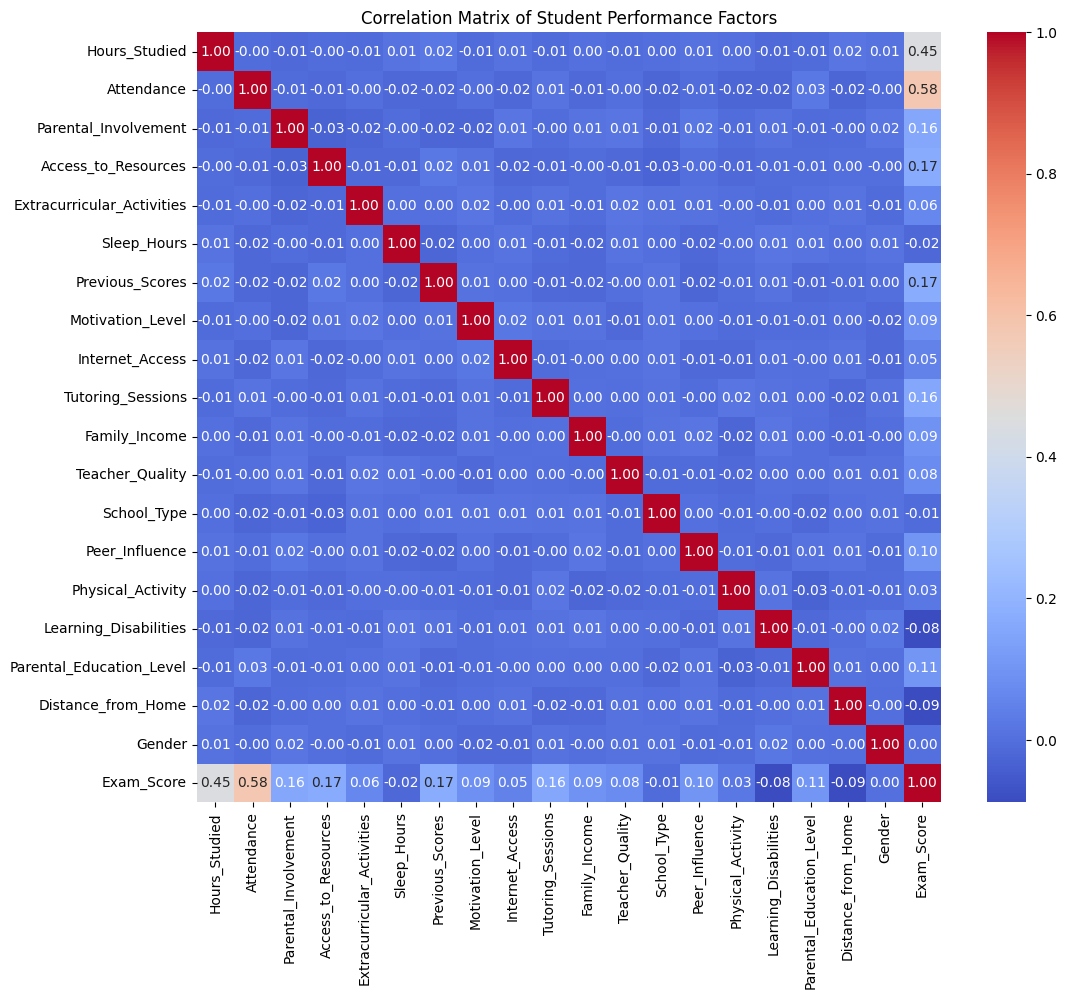

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Student Performance Factors")
plt.show()

In [ ]:
for col in df.columns:
  jumlah_outlier = count_outliers(df, col)
  print(f"Jumlah outlier di kolom '{col}': {jumlah_outlier}")

Jumlah outlier di kolom 'Hours_Studied': 22
Jumlah outlier di kolom 'Attendance': 0
Jumlah outlier di kolom 'Parental_Involvement': 0
Jumlah outlier di kolom 'Access_to_Resources': 0
Jumlah outlier di kolom 'Extracurricular_Activities': 0
Jumlah outlier di kolom 'Sleep_Hours': 0
Jumlah outlier di kolom 'Previous_Scores': 0
Jumlah outlier di kolom 'Motivation_Level': 0
Jumlah outlier di kolom 'Internet_Access': 485
Jumlah outlier di kolom 'Tutoring_Sessions': 26
Jumlah outlier di kolom 'Family_Income': 0
Jumlah outlier di kolom 'Teacher_Quality': 0
Jumlah outlier di kolom 'School_Type': 0
Jumlah outlier di kolom 'Peer_Influence': 0
Jumlah outlier di kolom 'Physical_Activity': 0
Jumlah outlier di kolom 'Learning_Disabilities': 0
Jumlah outlier di kolom 'Parental_Education_Level': 0
Jumlah outlier di kolom 'Distance_from_Home': 0
Jumlah outlier di kolom 'Gender': 0
Jumlah outlier di kolom 'Exam_Score': 52


In [ ]:
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

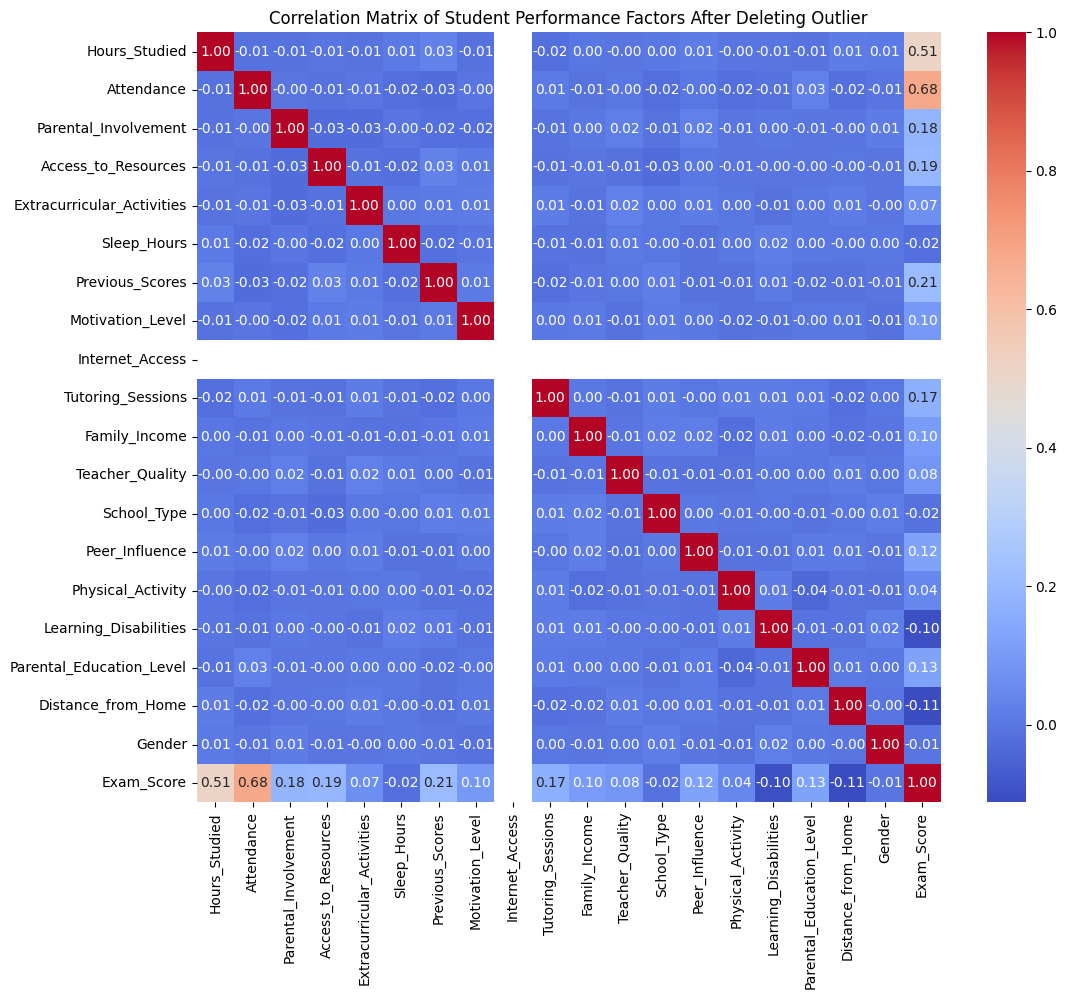

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Student Performance Factors After Deleting Outlier")
plt.show()

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


### Modelling

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression R-squared: 0.99
Gradient Boosting R-squared: 0.95
Random Forest R-squared: 0.90


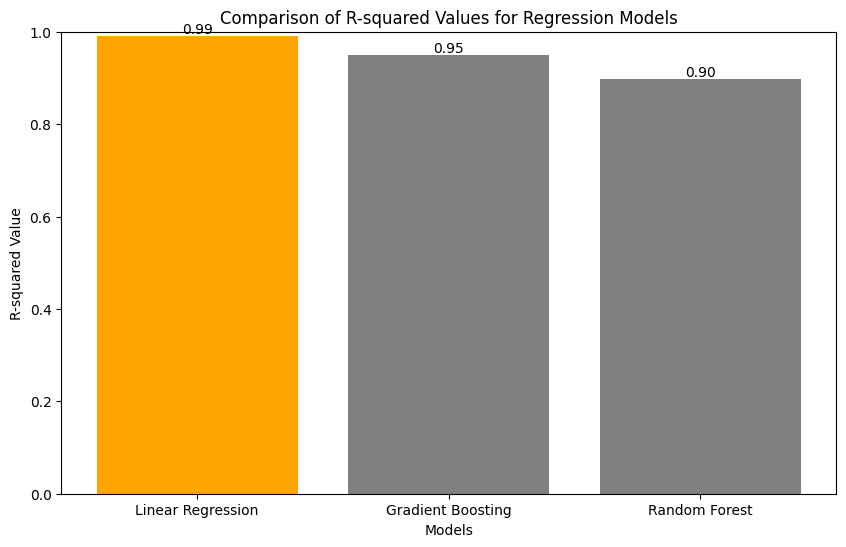

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize models
linear_model = LinearRegression()
gb_model = GradientBoostingRegressor()
rf_model = RandomForestRegressor()

# Train models
linear_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
linear_pred = linear_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate models
linear_r2 = r2_score(y_test, linear_pred)
gb_r2 = r2_score(y_test, gb_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Linear Regression R-squared: {linear_r2:.2f}")
print(f"Gradient Boosting R-squared: {gb_r2:.2f}")
print(f"Random Forest R-squared: {rf_r2:.2f}")
r2_values = [linear_r2, gb_r2, rf_r2]
models = ['Linear Regression', 'Gradient Boosting', 'Random Forest']

# Plotting
colors = ['gray' if r2 != max(r2_values) else 'orange' for r2 in r2_values]
plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_values, color=colors)

# Adding the value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('R-squared Value')
plt.title('Comparison of R-squared Values for Regression Models')
plt.ylim(0, 1)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regresi = LinearRegression()
regresi.fit(X_train, y_train)

LinearRegression()

### Evaluasi

In [ ]:
regresi_pred = regresi.predict(X_test)
regresi_r2 = r2_score(y_test, regresi_pred)

print(f"R2 Score = {regresi_r2}")

R2 Score = 0.9906060062541943


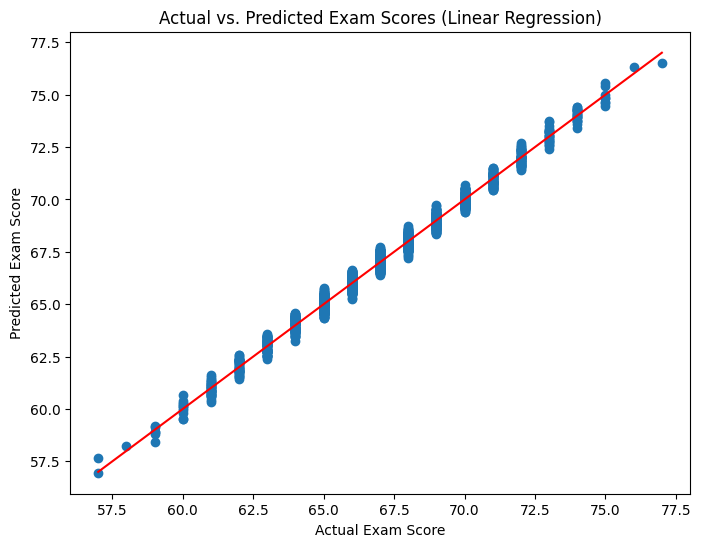

In [ ]:
y_pred = regresi.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs. Predicted Exam Scores (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regresi, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_scores.mean():.4f}")

Cross-validated R²: 0.9870


Pengaruh setiap faktor terhadap nilai ujian:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_standardized_coefficient(b, s_x, s_y):
    return b * (s_x / s_y)

# Menghitung standar deviasi untuk setiap fitur
s_x = X.std().values
s_y = y.std()

# Koefisien regresi
b = regresi.coef_

# Menghitung standardized coefficient untuk semua fitur
standardized_coefficients = np.array([
    calculate_standardized_coefficient(b_i, s_x_i, s_y)
    for b_i, s_x_i in zip(b, s_x)
])

# Mengonversi ke persentase kontribusi
absolute_values = np.abs(standardized_coefficients)
percentages = (absolute_values / absolute_values.sum()) * 100  # Normalisasi ke persen

# Membuat DataFrame untuk menyimpan hasil
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Standardized Coefficient': standardized_coefficients,
    'Percentage': percentages
}).sort_values(by='Percentage', ascending=False)

# Menampilkan DataFrame
print(coef_df)




                       Feature  Standardized Coefficient  Percentage
1                   Attendance                  0.697297   23.759774
0                Hours_Studied                  0.530314   18.069963
6              Previous_Scores                  0.214331    7.303132
3          Access_to_Resources                  0.210462    7.171311
2         Parental_Involvement                  0.207457    7.068897
9            Tutoring_Sessions                  0.179615    6.120229
16    Parental_Education_Level                  0.118091    4.023830
13              Peer_Influence                  0.114812    3.912118
10               Family_Income                  0.113036    3.851610
7             Motivation_Level                  0.107965    3.678796
17          Distance_from_Home                 -0.101607    3.462162
11             Teacher_Quality                  0.091082    3.103528
15       Learning_Disabilities                 -0.090279    3.076159
4   Extracurricular_Activities    

<ipython-input-150-fcd36424a029>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df['Percentage'], y=coef_df['Feature'], palette='viridis', legend=False)


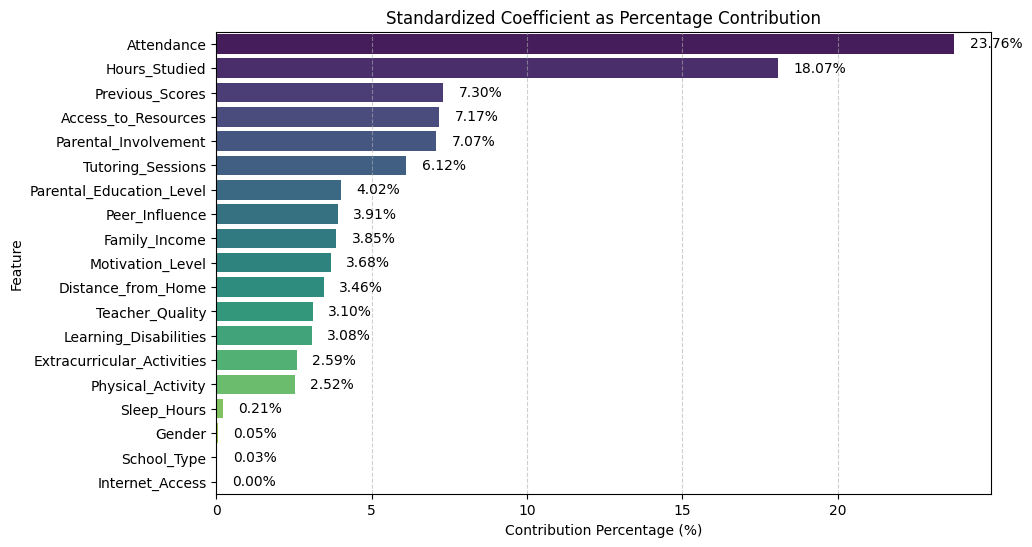

In [ ]:
# Plot hasil dengan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_df['Percentage'], y=coef_df['Feature'], palette='viridis', legend=False)
plt.xlabel('Contribution Percentage (%)')
plt.ylabel('Feature')
plt.title('Standardized Coefficient as Percentage Contribution')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Menampilkan nilai di setiap bar
for index, value in enumerate(coef_df['Percentage']):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')

plt.show()

In [ ]:
df = df.drop(['Internet_Access',
 'School_Type',
 'Gender',
 'Sleep_Hours',
 'Physical_Activity',
 'Extracurricular_Activities',
 'Learning_Disabilities',
 'Teacher_Quality', 'Distance_from_Home'], axis=1)

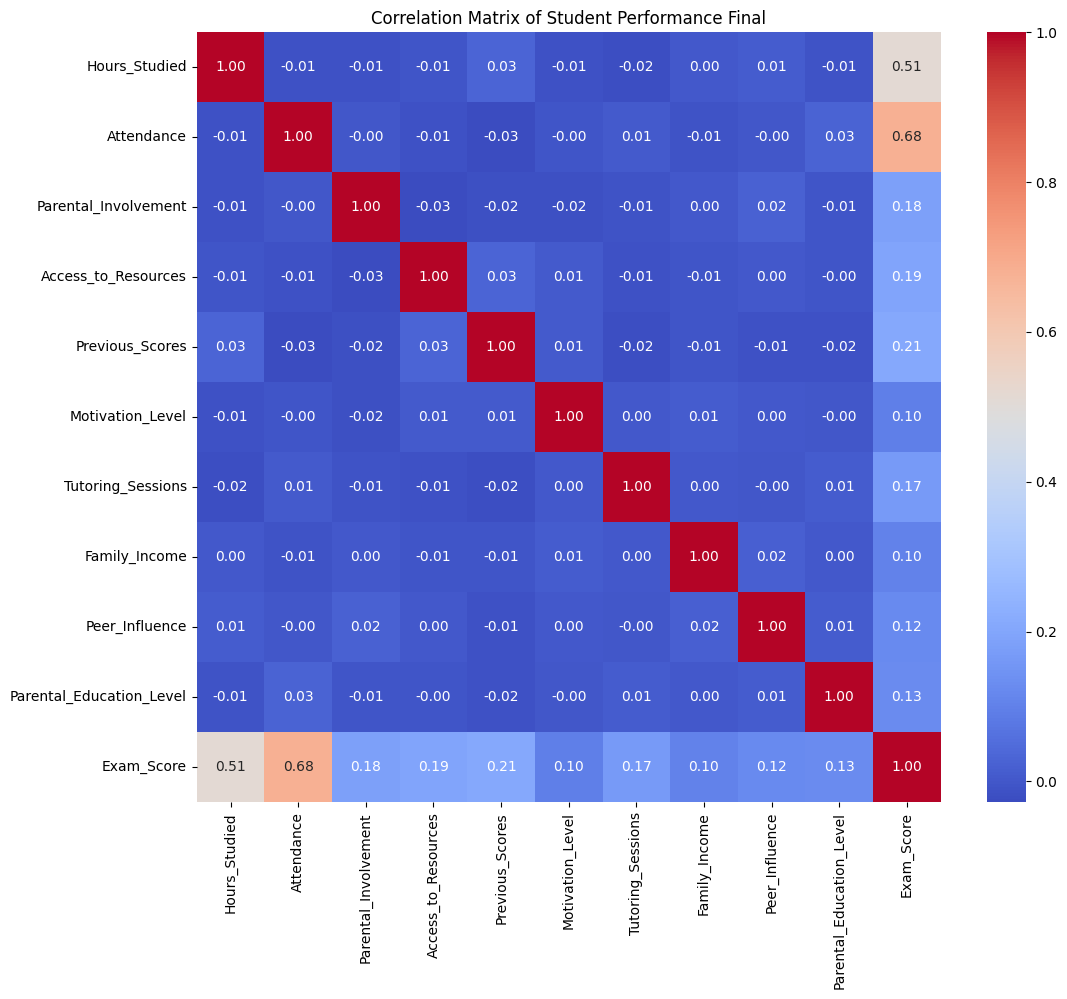

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Student Performance Final")
plt.show()

In [ ]:
for column in df.columns:
  mode_value = df[column].mode()[0]
  print(f"Mayoritas siswa pada parameter {column}: {mode_value}")

Mayoritas siswa pada parameter Hours_Studied: 20
Mayoritas siswa pada parameter Attendance: 67
Mayoritas siswa pada parameter Parental_Involvement: 2
Mayoritas siswa pada parameter Access_to_Resources: 2
Mayoritas siswa pada parameter Previous_Scores: 66
Mayoritas siswa pada parameter Motivation_Level: 2
Mayoritas siswa pada parameter Tutoring_Sessions: 1
Mayoritas siswa pada parameter Family_Income: 2
Mayoritas siswa pada parameter Peer_Influence: 3
Mayoritas siswa pada parameter Parental_Education_Level: 1
Mayoritas siswa pada parameter Exam_Score: 68
